In [ ]:
ls

drive/  sample_data/


In [ ]:
pwd

'/content'

In [ ]:
cd drive/MyDrive/IBM AI PROJECT

/content/drive/MyDrive/IBM AI PROJECT


In [ ]:
ls

DATASETS/  DATASETS.zip  FRUITS1.h5  FRUITS.h5


In [ ]:
##image data augumentation to expand the size of the training data set in order to improve the performance and also it supported by image data library and do all operations like brightness, rescaling etc

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
##As rightly pointed out by you the rescale=1./255 will convert the pixels in range [0,255] to range [0,1]. This process is also called Normalizing the input. Scaling every images to the same range [0,1] will make images contributes more evenly to the total loss.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
print(train_datagen)

In [ ]:
#flow from directory helps to read from the specific directory
#target size for all images have to passed as 64 height and 64 width
#The type of object is categorical
#Batch size : in every batch size how many images are passed.
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM AI PROJECT/DATASETS/Veg-dataset/train_set',target_size=(128,128),class_mode='categorical',batch_size=8)


Found 11386 images belonging to 9 classes.


In [ ]:
11386/16 #batch size = 16

711.625

In [ ]:
len(x_train)

1424

In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBM AI PROJECT/DATASETS/Veg-dataset/test_set',target_size=(128,128),class_mode='categorical',batch_size=16)

Found 3416 images belonging to 9 classes.


In [ ]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [ ]:
x_test.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [ ]:
#CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten
model=Sequential()

In [ ]:

model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##HIDDEN LAYERS

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))

In [25]:
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
1424/1424 [==============================] - 3769s 3s/step - loss: 1.1897 - accuracy: 0.6067 - val_loss: 0.9696 - val_accuracy: 0.6742
Epoch 2/20
1424/1424 [==============================] - 620s 435ms/step - loss: 0.6486 - accuracy: 0.7754 - val_loss: 0.4801 - val_accuracy: 0.8296
Epoch 3/20
1424/1424 [==============================] - 624s 438ms/step - loss: 0.5319 - accuracy: 0.8138 - val_loss: 0.5388 - val_accuracy: 0.8153
Epoch 4/20
1424/1424 [==============================] - 598s 420ms/step - loss: 0.4673 - accuracy: 0.8344 - val_loss: 0.4488 - val_accuracy: 0.8443
Epoch 5/20
1424/1424 [==============================] - 600s 421ms/step - loss: 0.4111 - accuracy: 0.8561 - val_loss: 0.2790 - val_accuracy: 0.8999
Epoch 6/20
1424/1424 [==============================] - 624s 438ms/step - loss: 0.3906 - accuracy: 0.8640 - val_loss: 0.2242 - val_accuracy: 0.9265
Epoch 7/20
1424/1424 [==============================] - 612s 430ms/step - loss: 0.3509 - accuracy: 0.8802 - val_lo

In [ ]:
##11m 41s
##completed at 2:49 PM

##36m 22s
##29m 45s

In [ ]:
## SAVING THE MODEL

In [26]:
model.save('VEGETABLES.h5')

In [ ]:
#listing of files to check whether model is saved

In [27]:
ls

DATASETS/  DATASETS.zip  FRUITS1.h5  FRUITS.h5  VEGETABLES.h5


In [ ]:
##TEST THE MODEL

In [28]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
#LOAD THE MODEL
model=load_model('VEGETABLES.h5')

In [30]:
model

In [31]:
img=image.load_img("/content/drive/MyDrive/IBM AI PROJECT/DATASETS/Veg-dataset/test_set/Tomato___Septoria_leaf_spot/sample.JPG")

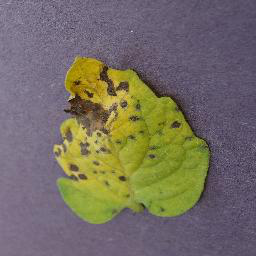

In [32]:
img

In [33]:
img=image.load_img("/content/drive/MyDrive/IBM AI PROJECT/DATASETS/Veg-dataset/test_set/Tomato___Septoria_leaf_spot/sample.JPG",target_size=(128,128))

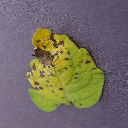

In [34]:
img

In [37]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [35]:
x=image.img_to_array(img)

In [36]:
x

array([[[126., 118., 139.],
        [124., 116., 137.],
        [120., 112., 133.],
        ...,
        [ 88.,  80., 103.],
        [ 86.,  78., 101.],
        [ 83.,  75.,  98.]],

       [[135., 127., 148.],
        [123., 115., 136.],
        [131., 123., 144.],
        ...,
        [ 92.,  84., 107.],
        [ 84.,  76.,  99.],
        [ 84.,  76.,  99.]],

       [[146., 138., 159.],
        [138., 130., 151.],
        [130., 122., 143.],
        ...,
        [ 93.,  85., 108.],
        [ 89.,  81., 104.],
        [ 87.,  79., 102.]],

       ...,

       [[128., 115., 135.],
        [128., 115., 135.],
        [128., 115., 135.],
        ...,
        [ 96.,  87., 108.],
        [ 97.,  88., 109.],
        [ 94.,  85., 106.]],

       [[127., 114., 134.],
        [127., 114., 134.],
        [127., 114., 134.],
        ...,
        [ 91.,  82., 103.],
        [ 91.,  82., 103.],
        [ 90.,  81., 102.]],

       [[125., 112., 132.],
        [125., 112., 132.],
        [125., 1

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)


In [38]:
img=image.load_img("/content/drive/MyDrive/IBM AI PROJECT/DATASETS/Veg-dataset/test_set/Tomato___Septoria_leaf_spot/sample.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']
index[y[0]]

[8]


'Tomato___Septoria_leaf_spot'